# CSCI 2820 - LINEAR ALGEBRA - SPRING 2025

Make sure you fill in any place that says `CODE SOLUTION HERE` or "CODE SOLUTION HERE", as well as your NAMES below:

In [ ]:
NAMES = "Carolyn Dockhorn, Christian Mesa, Kristin Off, Stephen Le"

# FINAL PROJECT (Option 1):  Approximating Eigenvalues and Eigenvectors and Applications in Discrete Dynamical Systems


In [2]:
## This is a Jupyter notebook for the CU Linear Algebra Final Project. 
## Professor Divya E. Vernerey and Arjun Peroor
## Spring 2025

In this first section we look at three methods that can be used to approximate the eigenvalues of a matrix $A$.  Although it is possible to find the exact eigenvalues for small matrices, the approach is impractical for larger matrices. Read Lay section 5.8 for more detailed information.

Most introductory textbooks demonstrate a direct way to compute eigenvalues of an $n\times n$ matrix $A$ by computing roots of an associated $n$th degree polynomial, known as the *characteristic polynomial*.  For example, suppose $A$ is a $2\times 2$ matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rr} a & b  \\ c & d \end{array}\right]
\end{equation}
$$

The eigenvalues of $A$ are solutions to the quadratic equation $\lambda^2 - (a+d)\lambda + ad-bc = 0$, which can be written explicitly in terms of $a$, $b$, $c$, and $d$ using the quadratic formula.  The challenges with larger matrices are that the polynomial is more difficult to construct, and the roots cannot be easily found with a formula.

The algorithms we describe in this section are iterative methods.  They generate a sequence of vectors $\{X^{(1)}, X^{(2)}, X^{(3)}, ... \}$ that approach a true eigenvector of the matrix under consideration.  An approximation of the corresponding eigenvalue can then be computed by multiplying the approximate eigenvector by $A$. 

## Power method (method 1)

The first algorithm we introduce for approximating eigenvalues is known as the **Power Method**.  This method generates a sequence of vectors by repeated matrix multiplication.  Under suitable conditions, the sequence of vectors approaches the eigenvector associated with the eigenvalue that is largest in absolute value.    

For the simplest explanation, suppose that $A$ is an $n\times n$ diagonalizable matrix with eigenvectors $\{V_1, V_2, ... V_n\}$, and that $\lambda_1$ is the eigenvalue of $A$ that is largest in absolute value.  To begin the Power Method, we choose any nonzero vector and label it $X^{(0)}$.  We can express $X^{(0)}$  as a linear combination of the eigenvectors since they form a basis for $\mathbb{R}^n$.

$$
\begin{equation}
X^{(0)} = c_1V_1 + c_2V_2 + ... c_nV_n
\end{equation}
$$

We now form a sequence of vectors $X^{(1)}$, $X^{(2)}$, $X^{(3)}$, ..., by setting $X^{(m)}= AX^{(m-1)}$.  Each of these vectors is also easly expressed in terms of the eigenvectors.

$$
\begin{eqnarray*}
X^{(1)} = AX^{(0)} & = & c_1AV_1 + c_2AV_2 + ... c_nAV_n \\
                   & = & c_1\lambda_1V_1 + c_2\lambda_2V_2 + ... c_n\lambda_nV_n \\
X^{(2)} = AX^{(1)} & = & c_1\lambda_1AV_1 + c_2\lambda_2AV_2 + ... c_n\lambda_nAV_n \\
                   & = & c_1\lambda_1^2V_1 + c_2\lambda_2^2V_2 + ... c_n\lambda_n^2V_n \\
                   & \vdots & \\
X^{(m)} = AX^{(m-1)} & = & c_1\lambda_1^{m-1}AV_1 + c_2\lambda_2^{m-1}AV_2 + ... c_n\lambda_n^{m-1}AV_n \\
                   & = & c_1\lambda_1^mV_1 + c_2\lambda_2^mV_2 + ... c_n\lambda_n^mV_n 
\end{eqnarray*}
$$

In the expression for $X^{(m)}$, we can then factor out $\lambda_1^m$ to understand what happens as $m$ gets large.

$$
\begin{equation}
X^{(m)} =  \lambda_1^m\left(c_1V_1 + c_2\left(\frac{\lambda_2}{\lambda_1}\right)^mV_2 + ... c_n\left(\frac{\lambda_n}{\lambda_1}\right)^mV_n\right) 
\end{equation}
$$

If $|\lambda_1| > |\lambda_i|$ for all $i\neq 1$, then $|\lambda_i/\lambda_1|< 1$ and $(\lambda_i/\lambda_1)^m$ will approach zero as $m$ gets large.  This means that if we repeatedly multiply a vector by the matrix $A$, eventually we will get a vector that is very nearly in the direction of the eigenvector that corresponds to the $\lambda_1$. 

Let's demonstrate the calculation on the matrix shown here before we discuss the method further.

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} -2 & 6 & 2 & -8 \\ -6 & 0 & 12 & 12 \\ -6 & 0 & 12 & 12 \\ -10 & 3 & 7 & 14 \end{array}\right]
\end{equation}
$$

As a matter of practicality, it is common to scale the vectors in the sequence to unit length as the Power Method is applied.  If the vectors in the sequence are not scaled, their magnitudes will grow if $\lambda_1>1$ or decay if $\lambda_1<1$.    Since all components of the vectors get divided by the same factor when the vector is scaled, this step doesn't change the ultimate behavior of the sequence.  The scaled sequence of vectors still approaches the direction of the eigenvector. 

We choose an arbitrary $X^{(0)}$ and calculate $X^{(20)}$ using the following rule.

$$
\begin{equation}
X^{(m)}=\frac{AX^{(m-1)}}{||AX^{(m-1)}||}
\end{equation}
$$

In [3]:
import numpy as np
import laguide as lag
A = np.array([[-2, 6, 2, -8],[-6, 0, 12, 12],[-6, 0, 12, 12],[-10, 3, 7, 14]])
X = np.array([[1],[0],[0],[0]])

m = 0
while (m < 20):
    X = A@X
    X = X/lag.Magnitude(X)
    m = m + 1
    
print(X)

[[ 1.57523994e-12]
 [-5.77350269e-01]
 [-5.77350269e-01]
 [-5.77350269e-01]]


Now if $X$ is the eigenvector of $A$ with unit magnitude, then $|AX| = |\lambda_1X| = |\lambda_1|$.  We can therefore approximate $|\lambda_1|$ with $|AX|$.

In [4]:
print(lag.Magnitude(A@X))

24.000000000020005


It appears that 24 is an estimate for $\lambda_1$.   To determine if our calculation is correct, we can compare $AX$ with $\lambda_1X$.  

In [5]:
print(A@X - 24*X)

[[-4.09561274e-11]
 [-9.45021839e-12]
 [-9.45021839e-12]
 [-1.57509561e-11]]


Indeed the difference $AX-24X$ is small.  Note that in this case, we can even do the calculation with integer multiplication.  Notice that $X$ has 0 in the first entry and the other entries are equal.  If we set these entries to 1, the result is easy to calculate even without the aid of the computer.  (*Remember that we can change the magnitude of an eigenvector and it is still an eigenvector.*) 

$$
\begin{equation}
AX = \left[ \begin{array}{rrrr} -2 & 6 & 2 & -8 \\ -6 & 0 & 12 & 12 \\ -6 & 0 & 12 & 12 \\ -10 & 3 & 7 & 14 \end{array}\right]
\left[ \begin{array}{r} 0 \\ 1\\ 1 \\ 1 \end{array}\right] =
\left[ \begin{array}{r} 0 \\ 24\\ 24 \\ 24 \end{array}\right] = 24X
\end{equation}
$$

In practice, we do not know how many iterations we need to perform in order to get a good approximation of the eigenvector.  Instead we should specify a condition upon which we will be satisfied with the approximation and terminate the iteration.  For example, since $||AX^{(m)}||\approx \lambda_1$ and $AX^{(m)}\approx \lambda_1X^{(m)}$ we might require that $AX^{(m)} - ||AX^{(m)}||X^{(m)} < \epsilon$ for some small number $\epsilon$ known as a tolerance.  This condition ensures that $X^{(m)}$ functions roughly like an eigenvector.  It is also best to include in the code a limit on the number of iterations that will be carried out.  This ensures that the computation will eventually end, even if a satisfactory result has not yet been achieved.

In [6]:
X = np.array([[1],[0],[0],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

## Compute difference in stopping condition
## Assign Y = AX to avoid computing AX multiple times
Y = A@X
difference = Y - lag.Magnitude(Y)*X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X = Y
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    Y = A@X
    difference = Y - lag.Magnitude(Y)*X
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
print("Magnitude of the difference is:")
print(lag.Magnitude(difference))


Eigenvector is approximately:
[[ 1.65181395e-06]
 [-5.77350269e-01]
 [-5.77350269e-01]
 [-5.77350269e-01]] 

Magnitude of the eigenvalue is approximately:
24.000020980823063 

Magnitude of the difference is:
4.328470441185797e-05


A more common condition to require is that $||X^{(m)} - X^{(m-1})|| < \epsilon$ for a given tolerance $\epsilon$.  This condition merely requires that the vectors in the sequence get close to one another, not that they are actually approximate an eigenvector.  

In [7]:
X = np.array([[1],[0],[0],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = A@X
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
print("Magnitude of the difference is:")
print(lag.Magnitude(difference))


Eigenvector is approximately:
[[ 2.64294012e-05]
 [-5.77350269e-01]
 [-5.77350269e-01]
 [-5.77350269e-01]] 

Magnitude of the eigenvalue is approximately:
24.000020980823063 

Magnitude of the difference is:
8.434774776931515e-05


While the Power Method is easy to understand and apply, it does have disadvantages.  The most apparent disadvantage is that the method only applies to the largest eigenvalue.  This is not a huge detriment since applications often only require an approximation of the largest eigenvalue.  Also, as we will demonstrate below, it is possible to easily modify the method to approximate the other eigenvalues.  A more significant disadvantage is that the rate at which the sequence converges can be slow in some circumstances.  For example, we can see that if $|\lambda_1|$ is close to $|\lambda_2|$, then $|\lambda_1/\lambda_2|^m$ approaches zero more slowly as $m$ gets large.  The Power Method may fail to converge at all if $|\lambda_1| = |\lambda_2|$, which occurs if $\lambda_1 = -\lambda_2$, or if $\lambda_1$ and $\lambda_2$ are a complex conjugate pair.  Additionally, the method may perform poorly if the $V_1$ component of $X^{(0)}$ is too small.  

## Inverse power method (method 2)

The **Inverse Power Method** is a modified version of the Power Method that allows us to approximate eigenvalues that are *not the largest*.  All that is needed to make the modification is two simple facts that relate changes in a matrix to changes in the eigenvalues of that matrix.  Let's suppose that $A$ is an invertible $n\times n$ matrix with eigenvalue $\lambda$ and corresponding eigenvector $V$, so that $AV=\lambda V$.  If we multiply this equation by $A^{-1}$, we get $V=\lambda A^{-1}V$, which can then be divided by $\lambda$ to illustrate the useful fact.

$$
\begin{equation}
A^{-1}V = \frac{1}{\lambda}V
\end{equation}
$$

If $\lambda$ is an eigenvalue of $A$, then $\lambda^{-1}$ is an eigenvalue of $A^{-1}$.  Furthermore the eigenvector of $A$ is also an eigenvector of $A^{-1}$.  The important point here is that if $\lambda_n$ is the smallest eigenvalue of $A$, then $\lambda_n^{-1}$ is the *largest* eigenvector of $A^{-1}$.  If we want to approximate the smallest eigenvalue of $A$, we can just apply the Power Method to $A^{-1}$.

We demonstrate the calculation for the following $3\times 3$ matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\end{equation}
$$

Again we choose an arbitrary $X^{(0)}$, and generate a sequence of vectors by multiplying by $A^{-1}$ and scaling the result to unit length.

$$
\begin{equation}
X^{(m)}=\frac{A^{-1}X^{(m-1)}}{||A^{-1}X^{(m-1)}||}
\end{equation}
$$

In [8]:
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
A_inv = lag.Inverse(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = A_inv@X
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue of A inverse is approximately:")
print(lag.Magnitude(A_inv@X),'\n')
print("Magnitude of the eigenvalue of A is approximately:")
print(lag.Magnitude(A@X),'\n')

Eigenvector is approximately:
[[-4.47193123e-01]
 [ 6.14168469e-05]
 [-8.94437425e-01]] 

Magnitude of the eigenvalue of A inverse is approximately:
0.3333371476391265 

Magnitude of the eigenvalue of A is approximately:
2.999931351114087 



The exact value of the smallest eigenvalue of $A$ is 3, which again can be verified by calculation.

$$
\begin{equation}
AV = \left[ \begin{array}{rrrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\left[ \begin{array}{r} 1 \\ 0\\ 2 \end{array}\right] =
\left[ \begin{array}{r} 3 \\ 0 \\ 6 \end{array}\right] = 3V
\end{equation}
$$

In our discussion of Inverse Matrices we noted that the construction of an inverse matrix is quite expensive since it requires the solution of $n$ systems of size $n\times n$.  An alternative to constructing $A^{-1}$ and computing the  $X^{(m)}=A^{-1}X^{(m-1)}$ is to solve the system $AX^{(m)}=X^{(m-1)}$ to obtain $X^{(m)}$.  This means that we solve one $n\times n$ system for every iteration.  This appears to require more work than the construction of $A^{-1}$, but in fact it is less since every system involves the same coefficient matrix.  We can therefore save much work by performing elimination only once and storing the result in an $LU$ factorization.  With the the matrix $A$ factored, each system $AX^{(m)}=X^{(m-1)}$ only requires one forward substitution and one backward substitution.  

In [9]:
import scipy.linalg as sla

X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
LU_factorization = sla.lu_factor(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)
    difference = X - X_previous
    m = m + 1
  
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue of A inverse is approximately:")
print(lag.Magnitude(sla.lu_solve(LU_factorization,X)),'\n')
print("Magnitude of the eigenvalue of A is approximately:")
print(lag.Magnitude(A@X),'\n')

Eigenvector is approximately:
[[-4.47193123e-01]
 [ 6.14168469e-05]
 [-8.94437425e-01]] 

Magnitude of the eigenvalue of A inverse is approximately:
0.3333371476391265 

Magnitude of the eigenvalue of A is approximately:
2.999931351114087 



## Shifted inverse power method (method 3)

Using a small modification to the Inverse Power Method, we can also approximate eigenvalues that are not the smallest.  For this variation of the method, we need to observe that if we "shift" the diagonal entries of a matrix by a scalar $\mu$, all of the eigenvalues of the matrix are also shifted by $\mu$.  Let $A$ be an $n\times n$ matrix with eigenvalue $\lambda$ and corresponding eigenvector $V$, so that $AV=\lambda V$.  Then $(A-\mu I)V = AV - \mu V = \lambda V - \mu V = (\lambda-\mu)V$, which means that $V$ is also an eigenvector of the matrix $(A-\mu I)$ corresponding to the eigenvalue $\lambda -\mu$.  

$$
\begin{equation}
\frac{1}{\lambda_1-\mu}, \frac{1}{\lambda_2-\mu}, \frac{1}{\lambda_3-\mu}, ....,\frac{1}{\lambda_n-\mu} 
\end{equation}
$$

This is useful because it allows us to now use the Inverse Power Method to approximate the eigenvalue of $A$ that lies closest to $\mu$.  For example, if $\mu$ is closest to $\lambda_2$, then $|\lambda_2-\mu| < |\lambda_i -\mu|$ for all other $i\neq 2$, which means that $(\lambda_2-\mu)$ can be approximated by applying the Inverse Power Method to $(A-\mu I)$.

We demonstrate the computation of the middle eigenvalue of the matrix from the previous example.

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\end{equation}
$$

By using the Inverse Power Method we determined that the smallest eigenvalue of $A$ is 3.  Applying the Power Method directly will show that the largest eigenvalue of $A$ is 12.  Since the third eigenvalue must lie somewhere in between these extremes, we choose $\mu$ to be exactly in the middle at $7.5$.  Note that once we have a good approximation to the eigenvector with $X^{(m)}$, we can approximate the eigenvalue of $A$ with $||AX^{(m)}||$.

In [10]:
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
I = np.eye(3)
mu = 7.5
Shifted_A = A-mu*I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("Eigenvector is approximately:")
print(X,'\n')
print("Eigenvalue of A is approximately:")
print(lag.Magnitude(A@X))

Eigenvector is approximately:
[[0.44232587]
 [0.88465174]
 [0.14744196]] 

Eigenvalue of A is approximately:
6.0


### Exercises

**Exercise 1:** Let $A$ be the matrix from the Inverse Power Method example.

$$
\begin{equation}
A = \left[ \begin{array}{rrr} 9 & -1 & -3 \\ 0 & 6 & 0 \\ -6 & 3 & 6 \end{array}\right]
\end{equation}
$$

($a$) Use the Power Method to approximate the largest eigenvalue $\lambda_1$.  Verify that the exact value of $\lambda_1$ is 12.

In [ ]:
## Code solution here.
import numpy as np
import laguide as lag


#define matrix 
A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])

#choose starting vector
X = np.array([[1],[0],[0]])

#parameters
m = 0
tolerance = 0.0001 
MAX_ITERATIONS = 100 

##compute difference in stopping condition
##assign Y = AX to avoid computing AX multiple times

Y = A@X #computes initial A@X
difference = Y - lag.Magnitude(Y)*X #checks eigenvector condition/how different AX is from being a scaled version of X

#power method iterations
while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X = Y
    X = X/lag.Magnitude(X)

    #compute difference in stopping condition
    Y = A@X
    difference = Y - lag.Magnitude(Y)*X
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
print("Magnitude of the difference is:")
print(lag.Magnitude(difference))

print("\nThe eigenvalue of lambda_1 is 12.")

($b$) Construct the line through $0$ and $Ax_k,$ that is, graph the iterations of the eigenvectors. What happens as $k$ increases? (hint: see Figure 1 of Lay page 322)

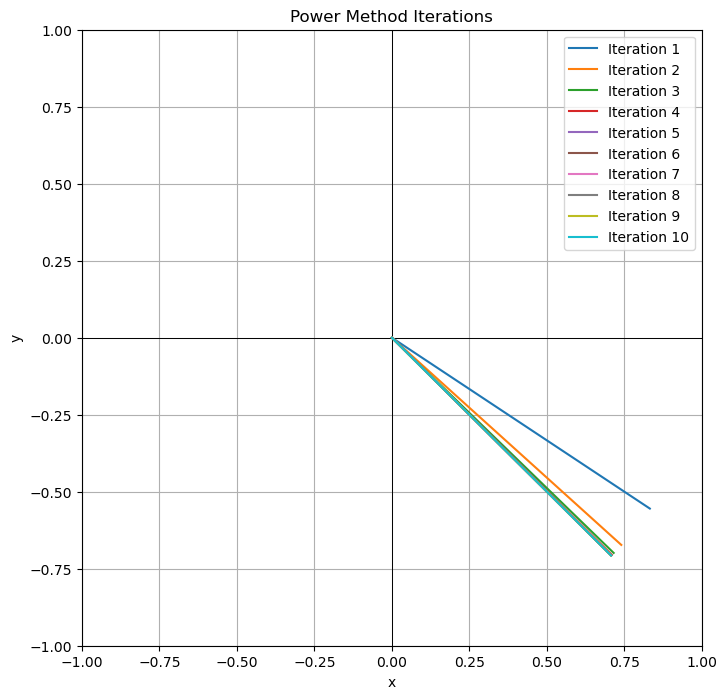

As we increase k we have our eigenvector get closer and closer to the dominant eigenvalue of A due to the increased iterations of the power method.


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import laguide as lag #imports

A = np.array([[9, -1, -3], [0, 6, 0], [-6, 3, 6]]) #setting up matrix
X = np.array([[1], [0], [0]])

num_iterations = 10 #how many eigenvectors we will create
eigenvector_sequence = [] #array to store the eigenvectors

#this iterates through to create the number of eigenvectors we want
for _ in range(num_iterations):
    X = A @ X #multiply the vector by our matrix 
    X_normalized = X / lag.Magnitude(X)  # normalize the vectors to unit length (was getting overflow errors)
    eigenvector_sequence.append(X_normalized) #add new vector to our sequence
    X = X_normalized # set X for the next iteration (so it builds and gets closer)

# plot setup stuff
plt.figure(figsize=(8, 8))
plt.axvline(0, color='black', linewidth=0.7)
plt.axhline(0, color='black', linewidth=0.7)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Power Method Iterations')
plt.grid(True)

#actually plots the lines
for i, v in enumerate(eigenvector_sequence):
    plt.plot([0, v[0, 0]], [0, v[2, 0]], label=f'Iteration {i+1}')

#more plot stuff
plt.legend()
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.show()

#answer to written part
print("As we increase k we have our eigenvector get closer and closer to the dominant eigenvalue of A due to the increased iterations of the power method.")

($c$) Apply the Inverse Power Method with a shift of $\mu = 10$.  Explain why the results differ from those in the example.

In [13]:
## Code solution here.
import numpy as np
import scipy.linalg as sla
import laguide as lag


#starting vector
X = np.array([[0],[1],[0]])

#parameters for iterations
m = 0 #counts iterations
tolerance = 0.0001 #threshold
MAX_ITERATIONS = 100
difference = X #difference vector

A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]])
I = np.eye(3)               #3x3 identity matrix (created for shifting)
mu = 10                     #shift amount
Shifted_A = A-mu*I          #shifted matrix
LU_factorization = sla.lu_factor(Shifted_A) #LU factorization of shifted matrix A
 
#inverse power method
while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X                          #compares previous vector
    X = sla.lu_solve(LU_factorization,X)    #LU factorization
    X = X/lag.Magnitude(X)                  #normalizes

    #Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1 #counter

print("Eigenvector is approximately:")
print(X,'\n')
print("Eigenvalue of A is approximately:")
print(lag.Magnitude(A@X))

#written answer
print("\nThe results differ because mu was equal to 7.5 in the example. The eigenvalue was approximately 6 whereas it's about 12 in this problem. The matrix was shifted closer to the middle in the example.\nThe matrix in the example is also slightly different.")

Eigenvector is approximately:
[[-7.07113254e-01]
 [-1.94211789e-05]
 [ 7.07100308e-01]] 

Eigenvalue of A is approximately:
11.999972530202639

The results differ because mu was equal to 7.5 in the example. The eigenvalue was approximately 6 whereas it's about 12 in this problem. The matrix was shifted closer to the middle in the example.
The matrix in the example is also slightly different.


($d$) Apply the Inverse Power Method with a shift of $\mu = 7.5$ and the initial vector given below.  Explain why the sequence of vectors approach the eigenvector corresponding to $\lambda_1$

$$
\begin{equation}
X^{(0)} = \left[ \begin{array}{r} 1 \\ 0  \\ 0 \end{array}\right]
\end{equation}
$$

In [14]:
import numpy as np
import scipy.linalg as sla #imports

X = np.array([[1],[0],[0]]) #given inital vector

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X #setting up loop

A = np.array([[9,-1,-3],[0,6,0],[-6,3,6]]) #given matrix
I = np.eye(3) #identiy matrix
mu = 7.5 #shift
Shifted_A = A-mu*I 
LU_factorization = sla.lu_factor(Shifted_A)

# runs through the shiften inverse power method
while (m < MAX_ITERATIONS and np.linalg.norm(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X) # gets linear equations
    X = X/np.linalg.norm(X) # normalizes vector

    ## Compute difference in stopping condition
    difference = X - X_previous

    m = m + 1

print("Eigenvector is approximately:") #results
print(X,'\n')
print("Eigenvalue of A is approximately:")
print(np.linalg.norm(A@X))

#answer to written part
print("\n I was expecting it to go toward 6 as the shift of 7.5 is the closest, but the initial vector did not allow that. The initial vector has very little projection that would allow growth toward 6, but it does have components that allow growth toward 12 (but not quite reach it).")

Eigenvector is approximately:
[[ 1.]
 [-0.]
 [-0.]] 

Eigenvalue of A is approximately:
10.816653826391969

 I was expecting it to go toward 6 as the shift of 7.5 is the closest, but the initial vector did not allow that. The initial vector has very little projection that would allow growth toward 6, but it does have components that allow growth toward 12 (but not quite reach it).


**Exercise 2:** Let $B$ be the following matrix.

$$
\begin{equation}
B = \left[ \begin{array}{rrrr} -2 & -18 & 6 \\ -11 & 3 & 11 \\ -27 & 15 & 31 \end{array}\right]
\end{equation}
$$

($a$) Apply the Power Method and Inverse Power Method with shifts to approximate all eigenvalues of the matrix $B$. (*Note that one of the eigenvalues of this matrix is negative.*)

In [15]:
## Code solution here.
# Copied the second form of the Power Method given (which only approximates eigenvalue, not eigenvector).
# This should find the largest magnitude eigenvalue of the matrix.
B = np.array([[-2, -18, 6],[-11, 3, 11],[-27, 15, 31]]) # Copied a definition of a matrix A and changed values to define B.
X = np.array([[1],[0],[0]]) # Adjusted dimensions of X (by removing the last 0) for multiplication with B.

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = B@X
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

# Copied and slightly adjusted statements to print the "largest" eigenvalue of B found with the code above.
print("Magnitude of the largest eigenvalue of B is approximately:")
print(lag.Magnitude(B@X),'\n') # Found and corrected error in this line after results were checked in 2b.
# Rounding up from the value printed, the largest eigenvalue of B has magnitude 36.

# Copied inverse power method code (second version, using LU factorization to reduce cost of inverse calculations).
# This should find the smallest magnitude eigenvalue of B.
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
BLU_factorization = sla.lu_factor(B) # Changed to use B matrix defined above.

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(BLU_factorization,X)
    X = X/lag.Magnitude(X)
    difference = X - X_previous
    m = m + 1

# Copied and slightly adjusted statements to print the smallest eigenvalue of B found with the code above.
print("Magnitude of the smallest eigenvalue of B is approximately:")
print(lag.Magnitude(B@X),'\n')
# Rounding down from the value printed, the smallest eigenvalue has magnitude 4

# Copied shifted inverse power method code to find the third eigenvalue of B.
# Since the value should be between the extremes already found, started with shift mu=2 (between 1 and 4, value 1 later found to be incorrect)
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

I = np.eye(3)
# Found an appropriate mu value through trial and error.
# All positive values (that were tested) returned known eigenvalue 4.
# Negative values less than -2 (that were tested) all return eigenvalue close to 8.
mu = -4
Shifted_B = B-mu*I
BLU_factorization = sla.lu_factor(Shifted_B)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(BLU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("The magnitude of the third eigenvalue of B is approximately:")
print(lag.Magnitude(B@X))
# Rounding up from the value printed, the eigenvalue of B closest to -4 has magnitude 8.
# Therefore, the negative eigenvalue of B is -8.
# Eigenvalues of B seem to be (approximately) 36, 4, and -8.

Magnitude of the largest eigenvalue of B is approximately:
35.999533009349214 

Magnitude of the smallest eigenvalue of B is approximately:
4.000549345743139 

The magnitude of the third eigenvalue of B is approximately:
7.999999999999998


($b$) Check your results using the $\texttt{eig}$ function in SciPy.

In [16]:
## Code solution here.
import numpy as np
from scipy import linalg as la

B = np.array([[-2, -18, 6],[-11, 3, 11],[-27, 15, 31]])

eigenvalues, eigenvectors = la.eig(B)

print("The eigenvalues of B are: ")
print(eigenvalues)

print("As shown above, the values match the values of 2a.") 
# Thanks Kristin for fixing 2A - Stephen

The eigenvalues of B are: 
[36.+0.j -8.+0.j  4.+0.j]
As shown above, the values match the values of 2a.


## Applications: Discrete Dynamical Systems

In this second section, we recall that eigenvalues and eigenvectors provide the key to understanding the long-term behavior, or evolution, of a dynamical system described by a difference equation $x_{k+1} = Ax_k.$ Read Lay, section 5.6 for more details.

**Exercise 3:** Produce the general solution of the dynamical system $x_{k+1}=Ax_k$ when $A$ is the stochastic matrix for the Hertz Rent-A-Car model in Denver. Assume that the company has a fleet of about 2000 cars. The pattern of rental and return locations is given by the factions in the table below. On a typical day, about how many cars will be rented or ready to rent from the downtown location where

$$
\begin{equation}
A = \left[ \begin{array}{rrrr} .90 & .01 & .09 \\ .01 & .90 & .01 \\ .09 & .09 & .90 \end{array}\right]
\end{equation}
$$

where columns represent cars rented from DIA, downtown, local airport, respectively, and the rows represent cars returned to DIA, downtown, local airport, respectively.


In [17]:
## Code solution here.
A = np.array([[.9, .01, .09],[.01, .9, .01],[.09, .09, .9]]) # Copied B matrix from excercise 2A and changed values to define A.
# Copied the first form of the power method to approximate the largest eigenvalue and eigenvector of A.
X = np.array([[1],[0],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

## Compute difference in stopping condition
## Assign Y = AX to avoid computing AX multiple times
Y = A@X
difference = Y - lag.Magnitude(Y)*X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X = Y
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    Y = A@X
    difference = Y - lag.Magnitude(Y)*X
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
# The value printed can be rounded up to an approximate value of 1.
# Saving the eigenvector with a different variable name for future use.
Eg_one = X

# Copied inverse power method to check the smallest eigenvalue of A.
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
LU_factorization = sla.lu_factor(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)
    difference = X - X_previous
    m = m + 1

print("Magnitude of the smallest eigenvalue is approximately:")
print(lag.Magnitude(A@X),'\n')
# The value printed is ~.81, which is less than 1.

# Copied shifted inverse power method code to find/verify the third eigenvalue of A.
# Since the value should be between the extremes already found, started with shift mu=.9 (between .81 and 1)
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

I = np.eye(3)
mu = .9
Shifted_A = A-mu*I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("The magnitude of the third eigenvalue is approximately:")
print(lag.Magnitude(A@X))
# The value printed is around .89, which is also less than 1.

# Following the general equation numbered (2) in section 5.6 of the textbook,
# the long term behavior of this system depends only on the first eigenvalue and eigenvector found
# because the first eigenvalue is (approximately) equal to 1 and terms with the other two eigenvalues
# (both less than 1) will go to 0.

# Since the eigenvector found with the power method represents ratios of cars at each location
# the print statements below were used to find a constant coefficient for which the total number
# of cars across all locations would be 2000.
print('\n',1300*Eg_one)
print("The sum total number of cars is:", 872+181+947)
# On a typical day, there should be around 181 cars available (or rented) from the downtown location.

Eigenvector is approximately:
[[0.6704931 ]
 [0.13927852]
 [0.72872525]] 

Magnitude of the eigenvalue is approximately:
0.9999662329677834 

Magnitude of the smallest eigenvalue is approximately:
0.8099550052382327 

The magnitude of the third eigenvalue is approximately:
0.8899999999999999

 [[871.64103419]
 [181.06207048]
 [947.34282821]]
The sum total number of cars is: 2000


**Exercise 4:** Construct a stage-matrix model for an animal species that has two life stages: juvenile (up to 1 year old) and adult. Suppose the female adults give birth each year to an average of 1.6 female juveniles. Each year, 30% of the juveniles survive to become adults and 80% of the adults survive. For $k\geq 0,$ let $x_k=(j_k, a_k),$ where the entries in $x_k$ are the numbersof female juveniles and female adults in year $k.$

($a$) Construct the stage-matrix $A$ such that $x_{k+1} = Ax_k$ for $k \geq 0.$

In [18]:
import numpy as np #imports

females_rate = 1.6  
juvenile_survival = 0.3  
adult_survival = 0.8    #given rates

A = np.array([[0, females_rate], [juvenile_survival, adult_survival]]) #array creation

print("A:\n", A) #print matrix

A:
 [[0.  1.6]
 [0.3 0.8]]


($b$)  Show that the population is growing, compute the even- tual growth rate of the population, and give the eventual ratio of juveniles to adults.

In [ ]:
## Code solution here.
import numpy as np
from scipy.linalg import eig  
import laguide as lag

females_rate = 1.6  
juvenile_survival = 0.3  
adult_survival = 0.8    #given rates

A = np.array([[0, females_rate], [juvenile_survival, adult_survival]]) #array creation

#starting vector
X = np.array([[1],[0]])

#parameters
m = 0
tolerance = 0.0001 
MAX_ITERATIONS = 100 

##compute difference in stopping condition
##assign Y = AX to avoid computing AX multiple times

Y = A@X #computes initial A@X
difference = Y - lag.Magnitude(Y)*X #checks eigenvector condition/how different AX is from being a scaled version of X

#power method iterations
while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X = Y
    X = X/lag.Magnitude(X)

    #compute difference in stopping condition
    Y = A@X
    difference = Y - lag.Magnitude(Y)*X
    
    m = m + 1

lambda_1 = lag.Magnitude(Y) #dominant evalue
juvenile, adult = X.flatten() #converts 2D into 1D so we can get a proper variable
ratio = juvenile/adult

print("Eventual growth rate of the population:",lambda_1)
print("Ratio of juveniles to adults:", f"{juvenile:.4f}:{adult:.4f}")

#The population is growing because the growth rate is larger than 1.

Eventual growth rate of the population: 1.1999577305737086
Ratio of juveniles to adults: 0.8000:0.6000


($c$)  Suppose that initially there are 15 juveniles and 10 adults in the population. Produce four graphs that show how the population changes over eight years: (1) the number of juveniles, (2) the number of adults, (3) the total population, and (4) the ratio of juveniles to adults (each year). Further, when does the ratio in (4) seem to stabilize? 

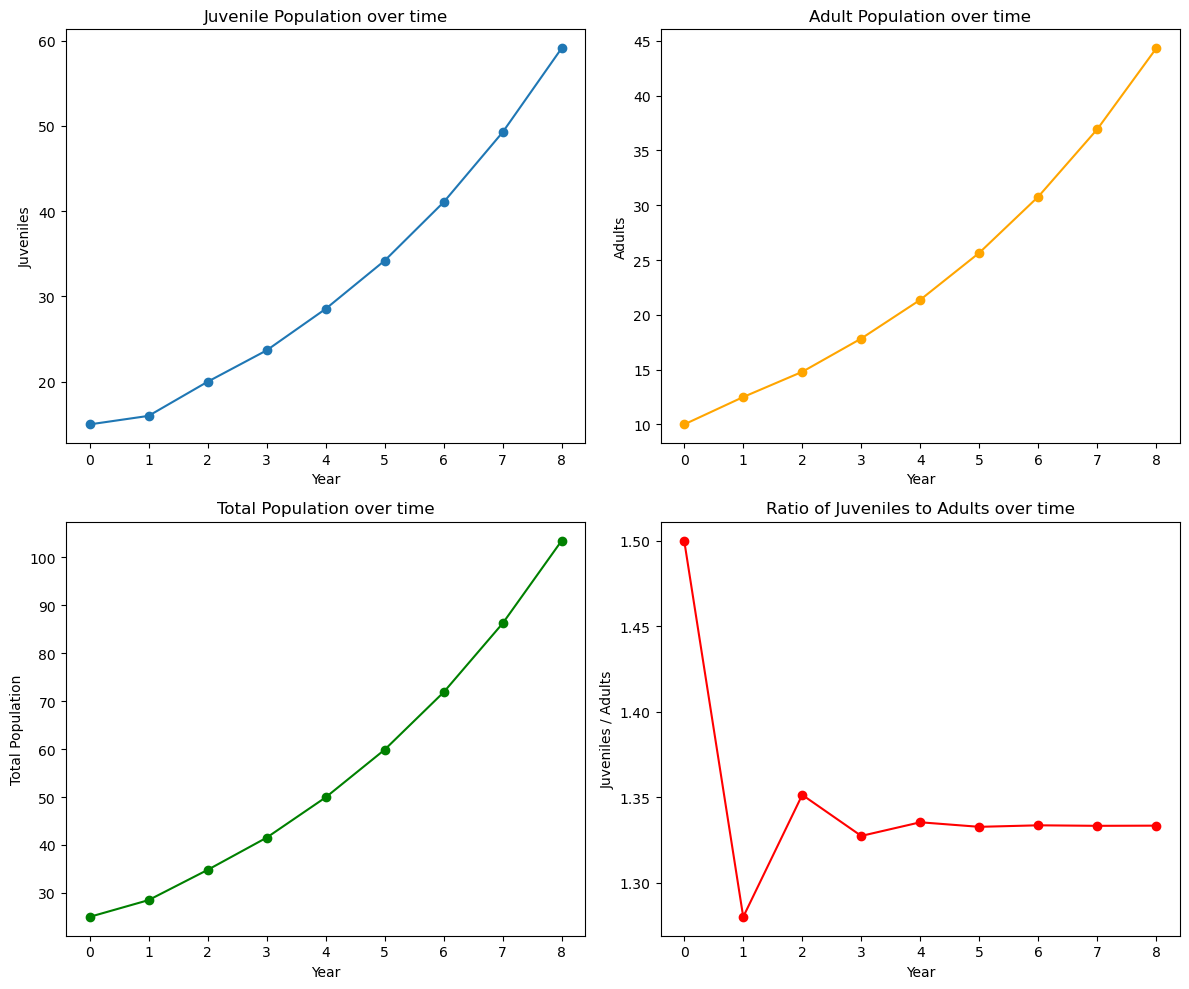

The ratio in the 4th graph, ratio of juveniles to adults, the ratio seems to stabilize around the 3rd-4th year and begins to flatten out.


In [20]:
## Code solution here.
import numpy as np
from scipy import linalg as lag
import matplotlib.pyplot as plt

females_rate = 1.6
juvenile_survival = 0.3
adult_survival = 0.8

A = np.array([[0, females_rate], [juvenile_survival, adult_survival]])

x0 = np.array([15, 10]) #15 Juveniles, 10 Adults

years = 8
juveniles = [x0[0]]
adults = [x0[1]]
total_population = [sum(x0)]
ratio_juvenile_to_adult = [x0[0] / x0[1]]

x = x0
for _ in range(years):
    x = A @ x
    juveniles.append(x[0])
    adults.append(x[1])
    total_population.append(sum(x))
    ratio_juvenile_to_adult.append(x[0] / x[1])

time = list(range(years + 1))
plt.figure(figsize=(12,10))

# Juveniles
plt.subplot(2, 2, 1)
plt.plot(time, juveniles, marker='o')
plt.title("Juvenile Population over time")
plt.xlabel("Year")
plt.ylabel("Juveniles")

# Adults
plt.subplot(2, 2, 2)
plt.plot(time, adults, marker='o', color='orange')
plt.title("Adult Population over time")
plt.xlabel("Year")
plt.ylabel("Adults")

# Total Population
plt.subplot(2, 2, 3)
plt.plot(time, total_population, marker='o', color='green')
plt.title("Total Population over time")
plt.xlabel("Year")
plt.ylabel("Total Population")

# Ratio of Juveniles to Adults
plt.subplot(2, 2, 4)
plt.plot(time, ratio_juvenile_to_adult, marker='o', color='red')
plt.title("Ratio of Juveniles to Adults over time")
plt.xlabel("Year")
plt.ylabel("Juveniles / Adults")

plt.tight_layout()
plt.show()

print("The ratio in the 4th graph, ratio of juveniles to adults, the ratio seems to stabilize around the 3rd-4th year and begins to flatten out.")

**Exercise 5:** A herd of American buffalo (bison) can be modeled by a stage matrix similar to that for the spotted owls. The females can be divided into calves (up to 1 year old), yearlings (1 to 2 years), and adults. Suppose an average of 42 female calves are born each year per 100 adult females. (Only adults produce offspring.) Each year, about 60% of the calves survive, 75% of the yearlings survive, and 95% of the adults survive. For $k\geq 0,$ let $x_k=(c_k, y_k, a_k)$, where the entries in $x_k$ are the numbers of females in each life stage at year $k.$


($a$)  Construct the stage-matrix $A$ for the buffalo herd, such that $x_{k+1}=Ax_k$ for $k\geq 0.$

In [21]:
## Code solution here.
import numpy as np
from scipy import linalg as lag

calves_survivability = 0.60
yearlings_survivability = 0.75
adults_survivability = 0.95
birth_rate = 0.42

A = np.array([[0, 0, birth_rate], [calves_survivability, 0, 0], [0, yearlings_survivability, adults_survivability]])

print("A: \n", A)


A: 
 [[0.   0.   0.42]
 [0.6  0.   0.  ]
 [0.   0.75 0.95]]


($b$)  Show that the buffalo herd is growing, determine the expected growth rate after many years, and give the expected numbers of calves and yearlings present per 100 adults.

In [22]:
## Code solution here.
# Only including imports here so that names will match those used in copied code from instructions.
import laguide as lag
import scipy.linalg as sla

# Copied the first form of the power method to approximate the largest eigenvalue and eigenvector of A.
X = np.array([[1],[0],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

## Compute difference in stopping condition
## Assign Y = AX to avoid computing AX multiple times
Y = A@X
difference = Y - lag.Magnitude(Y)*X

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X = Y
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    Y = A@X
    difference = Y - lag.Magnitude(Y)*X
    
    m = m + 1
    
print("Eigenvector is approximately:")
print(X,'\n')
print("Magnitude of the eigenvalue is approximately:")
print(lag.Magnitude(Y),'\n')
# The largest eigenvalue is about 1.1 (slightly greater than 1).
# Saving the eigenvector with a different variable name for future use.
Eg_one = X

# Copied inverse power method to check the smallest eigenvalue of A.
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100

difference = X
LU_factorization = sla.lu_factor(A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)
    difference = X - X_previous
    m = m + 1

print("Magnitude of the smallest eigenvalue is approximately:")
print(lag.Magnitude(A@X),'\n')
# The smallest eigenvalue is about .29 (much less than 1).

# Copied shifted inverse power method code to find/verify the third eigenvalue of A.
# Since the value should be between the extremes already found, started with shift mu=.8 (between .29 and 1.1)
X = np.array([[0],[1],[0]])

m = 0
tolerance = 0.0001
MAX_ITERATIONS = 100
difference = X

I = np.eye(3)
mu = .4 # Found through trial and error something that gives a unique eigenvalue.
Shifted_A = A-mu*I
LU_factorization = sla.lu_factor(Shifted_A)

while (m < MAX_ITERATIONS and lag.Magnitude(difference) > tolerance):
    X_previous = X
    X = sla.lu_solve(LU_factorization,X)
    X = X/lag.Magnitude(X)

    ## Compute difference in stopping condition
    difference = X - X_previous
    
    m = m + 1

print("The magnitude of the third eigenvalue is approximately:")
print(lag.Magnitude(A@X))
# The third eigenvalue appears to be around .67 (even if this result is inaccurate, the value seems to be less than 1).

# The population is growing because the largest eigenvalue (1.1) is greater than 1.
# Following the general equation numbered (2) and Example 7 in section 5.6 of the textbook,
# the long term growth rate of the population is given by/equal to the eigenvalue 1.1
# with the corresponding eigenvector determining exact population counts.
# Note that terms in the equation related to the other two eigenvalues will go to 0 due to the eigenvalues being less than 1.

# Print statement used to find populations per 100 adults.
print('\n',109*Eg_one)
# There should be around 38 calves and 20 yearlings per 100 adults.

Eigenvector is approximately:
[[0.34895317]
 [0.189517  ]
 [0.9177772 ]] 

Magnitude of the eigenvalue is approximately:
1.1048392963384461 

Magnitude of the smallest eigenvalue is approximately:
0.2898704792309992 

The magnitude of the third eigenvalue is approximately:
0.6739496618012267

 [[ 38.0358959 ]
 [ 20.65735305]
 [100.03771483]]


## Final Discussion: 

Please provide a 250-300 word report on what you learned from this project. Provide any more details about the project and expand on your favorite part of the project. Include any other information you have about this.

In [23]:
## Code solution here.


### References

- Burden, Richard L. et al. *Numerical Analysis*. 10th ed., Cengage Learning, 2014.
- Golub, Gene H. and Charles F. Van Loan. *Matrix Computations*., The Johns Hopkins University Press, 1989.
- Lay, David C. et al. *Linear Algebra and its Applications*., 5th ed., Pearson, 2016. 
